In [1]:
#Step 1: Import Necessary Libraries

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Step 2: Load and Preprocess the Dataset
#Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add a channel dimension (for compatibility with convolutional layers)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


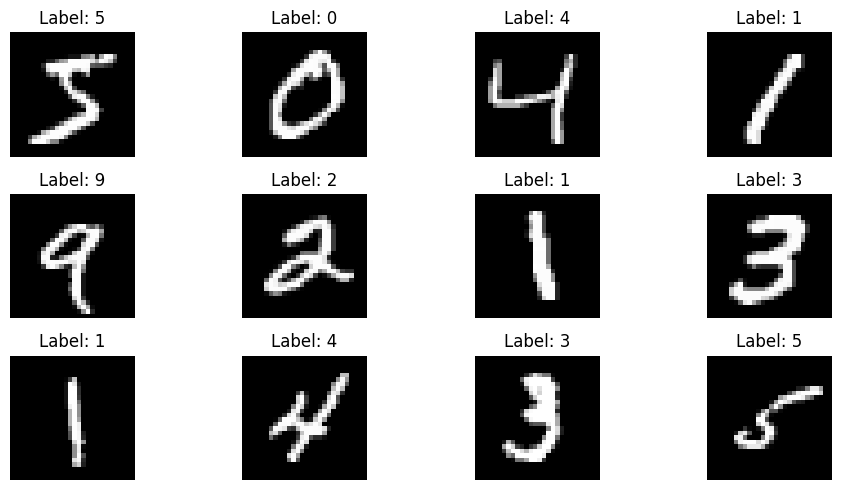

In [3]:
#
#Display a few images from the dataset
plt.figure(figsize=(10, 5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [4]:
#Step 4: Build the Deep Learning Model

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Step 5: Train the Model
#Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.9134 - loss: 0.2849 - val_accuracy: 0.9845 - val_loss: 0.0444
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9867 - loss: 0.0415 - val_accuracy: 0.9886 - val_loss: 0.0341
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9908 - loss: 0.0277 - val_accuracy: 0.9894 - val_loss: 0.0327
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9940 - loss: 0.0185 - val_accuracy: 0.9888 - val_loss: 0.0356
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9962 - loss: 0.0121 - val_accuracy: 0.9902 - val_loss: 0.0322
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9964 - loss: 0.0115 - val_accuracy: 0.9910 - val_loss: 0.0356
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9973 - loss: 0.0086 - val_accuracy: 0.9916 - val_loss: 0.0351
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 25ms/step - accuracy: 0.9982 -

In [6]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 - 2s - 7ms/step - accuracy: 0.9905 - loss: 0.0371
Test Accuracy: 99.05%


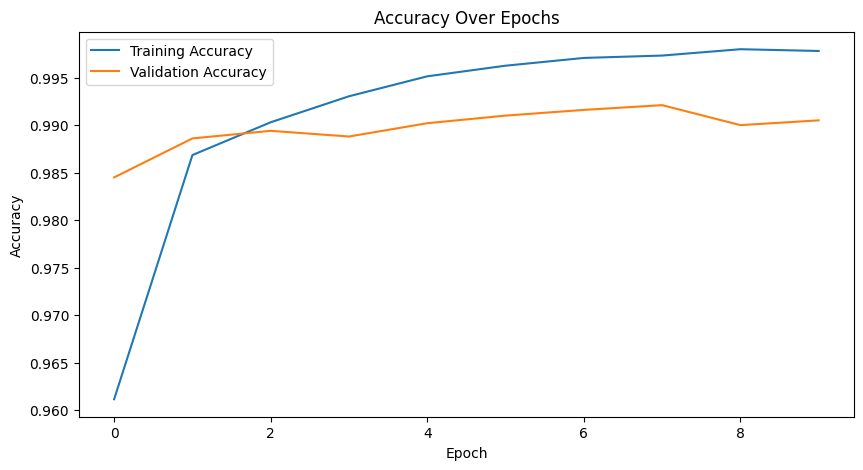

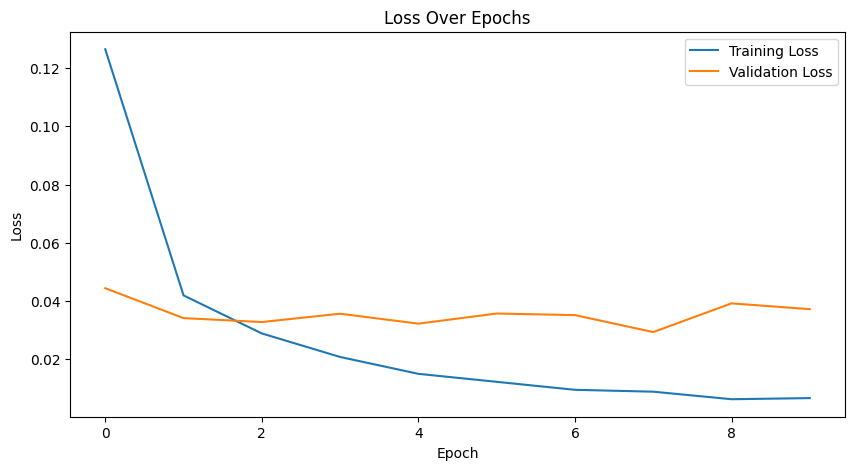

In [7]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


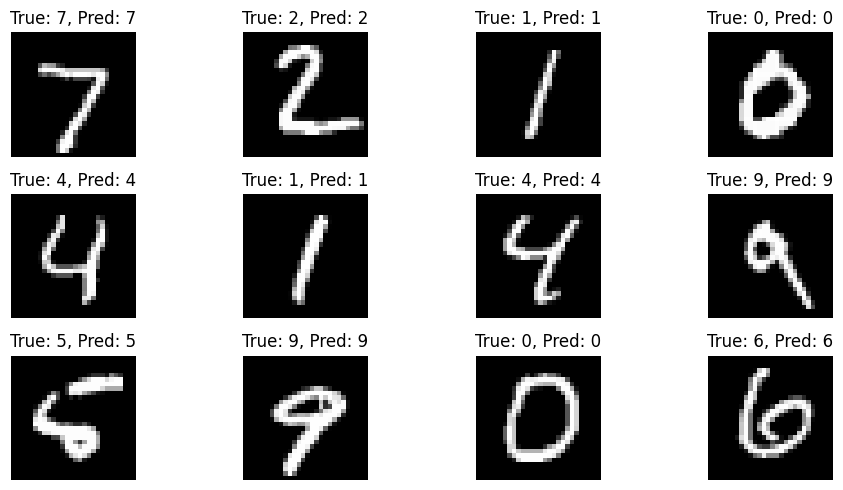

In [8]:
# Predict on test set
predictions = model.predict(x_test)

# Visualize some predictions
plt.figure(figsize=(10, 5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f"True: {np.argmax(y_test[i])}, Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [9]:
model.save('mnist_cnn_model.h5')